Petrol price forecasting using auto keras and tensorflow|

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df1=pd.read_csv('/content/train_data.csv')

In [6]:
df1

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61




```Data analysis and splitting the data

In [6]:
df2=df1.dropna()

In [7]:
df2.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [8]:
#will rename the petrol(usd)to petrol
df2.rename(columns={'Petrol (USD)':'Petrol'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df2.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


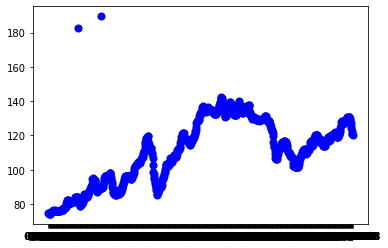

In [10]:
#seeing in scatterplot
plt.scatter(df2.Date,df2.Petrol,color='blue',label='Price',s=50)

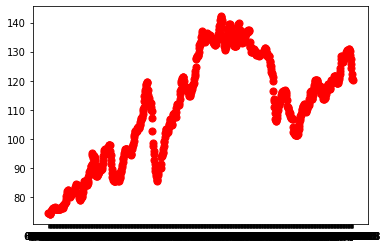

In [11]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date,df3.Petrol,color='red',label='Price',s=50)

In [12]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [14]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [15]:
#Preprocssing the data
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [17]:
train_data.shape
test_data.shape

(284, 1)

Data Preprocessing

In [19]:
import numpy
#convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[1 + time_step,0])
  return numpy.array(datax),numpy.array(datay)

In [20]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [21]:
print(x_train.shape),print(y_train.shape)

(424, 100)
(424,)


(None, None)

In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 9s 409ms/step - loss: 0.0056 - val_loss: 0.2410
Epoch 2/100
7/7 [==============================] - 1s 179ms/step - loss: 0.0015 - val_loss: 0.1943
Epoch 3/100
7/7 [==============================] - 1s 180ms/step - loss: 5.8966e-04 - val_loss: 0.2237
Epoch 4/100
7/7 [==============================] - 1s 181ms/step - loss: 1.5699e-04 - val_loss: 0.2051
Epoch 5/100
7/7 [==============================] - 1s 180ms/step - loss: 6.0684e-05 - val_loss: 0.2198
Epoch 6/100
7/7 [==============================] - 1s 181ms/step - loss: 3.9544e-05 - val_loss: 0.2092
Epoch 7/100
7/7 [==============================] - 1s 185ms/step - loss: 2.2413e-05 - val_loss: 0.2168
Epoch 8/100
7/7 [==============================] - 1s 182ms/step - loss: 7.0958e-06 - val_loss: 0.2119
Epoch 9/100
7/7 [==============================] - 1s 179ms/step - loss: 5.1208e-06 - val_loss: 0.2153
Epoch 10/100
7/7 [==============================] - 1s 174ms/step - loss: 5.1304e

In [26]:
#Lets do prediction and check performance metrix
train_predict=model.predict(x_train)
test_predict=(model.predict(x_test))

In [27]:
#transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

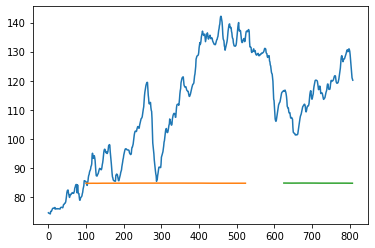

In [31]:
##Plotting
#shift train prediction for plotting
look_back=100
train_predictplot=numpy.empty_like(df4)
train_predictplot[:,:]=np.nan
train_predictplot[look_back:len(train_predict)+ look_back, :] = train_predict
#Shift test prediction for plotting
test_predictplot=numpy.empty_like(df4)
test_predictplot[:,:]=numpy.nan
test_predictplot[len(train_predict)+(look_back*2)+1:len(df4) - 1,:]=test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(df4))
plt.plot(train_predictplot)
plt.plot(test_predictplot)
plt.show()

In [37]:
df_test=pd.read_csv('test_data.csv')
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [33]:
model.save('Petrol price prediction')

INFO:tensorflow:Assets written to: Petrol price prediction/assets


INFO:tensorflow:Assets written to: Petrol price prediction/assets


Using ARIMA

In [34]:
!pip install --upgrade patsy

In [35]:
!pip install statsmodels

In [36]:
!pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 4.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
